In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
words=open("names.txt",'r').read().splitlines()

In [3]:
## Encode String to Int
chars=sorted(set(''.join(words)))
stoi=dict()
itos=dict()
stoi["."]=0
itos[0]="."
for i,char in enumerate(chars):
    stoi[char]=i+1
    itos[i+1]=char

In [4]:
window_size=3
X,y=[],[]
for word in words:
    print(word)
    context=[0]*window_size
    for ch in word + '.':
        ix=stoi[ch]
        X.append(context)
        y.append(ix)
        print("".join(itos[i] for i in context),"--->",itos[ix])
        context=context[1:]+[ix]
X=torch.tensor(X)
y=torch.tensor(y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .
charlotte
... ---> c
..c ---> h
.ch ---> a
cha ---> r
har ---> l
arl ---> o
rlo ---> t
lot ---> t
ott ---> e
tte ---> .
mia
... ---> m
..m ---> i
.mi ---> a
mia ---> .
amelia
... ---> a
..a ---> m
.am ---> e
ame ---> l
mel ---> i
eli ---> a
lia ---> .
harper
... ---> h
..h ---> a
.ha ---> r
har ---> p
arp ---> e
rpe ---> r
per ---> .
evelyn
... ---> e
..e ---> v
.ev ---> e
eve ---> l
vel ---> y
ely ---> n
lyn ---> .
abigail
... ---> a
..a ---> b
.ab ---> i
abi ---> g
big ---> a
iga ---> i
gai ---> l
ail ---> .
emily
... ---> e
..e ---> m
.em ---> i
emi ---> l
mil ---> y
ily ---> .
elizabeth
... ---> e
..e ---

In [5]:
X.shape , X.dtype, y.shape,y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [6]:
g=torch.Generator().manual_seed(2147483647)

In [7]:
reduct_dim=2
C=torch.randn((len(chars)+1,reduct_dim),generator=g)
embed_table=C[X]
embed_table.shape

torch.Size([228146, 3, 2])

In [8]:
w1=torch.randn((embed_table.shape[1]*embed_table.shape[2],100),generator=g)
b1=torch.randn(100,generator=g)
h1=embed_table.view(-1,embed_table.shape[1]*embed_table.shape[2]) @ w1 +b1
ac1=torch.tanh(h1)
ac1.shape

torch.Size([228146, 100])

In [9]:
w2=torch.randn((ac1.shape[1],27),generator=g)
b2=torch.randn(27,generator=g)
logits=ac1 @ w2 + b2
loss=F.cross_entropy(logits,y)
loss


tensor(19.5060)

In [11]:
"""counts=logits.exp()
prob=counts/counts.sum(1,keepdim=True)
prob.shape
loss= -prob[torch.arange(32),y].log().mean()
loss"""
#This is equal with F.cross_entropy(logits,y)

'counts=logits.exp()\nprob=counts/counts.sum(1,keepdim=True)\nprob.shape\nloss= -prob[torch.arange(32),y].log().mean()\nloss'

In [7]:
window_size=3
def build_dataset(words):
    X,y=[],[]
    for word in words:
        context=[0]*window_size
        for ch in word + '.':
            ix=stoi[ch]
            X.append(context)
            y.append(ix)
            context=context[1:]+[ix]
    X=torch.tensor(X)
    y=torch.tensor(y)
    return X,y
    

In [8]:
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

X_train,y_train=build_dataset(words[:n1])
X_valid,y_valid=build_dataset(words[n1:n2])
X_test,y_test=build_dataset(words[n2:])

In [12]:
## Model Parameters
g=torch.Generator().manual_seed(2147483647)
reduct_dim=10
n_hidden=200
C=torch.randn((len(chars)+1,reduct_dim),generator=g)
w1=torch.randn((window_size*reduct_dim,n_hidden),generator=g)
b1=torch.randn(n_hidden,generator=g)
w2=torch.randn((n_hidden,27),generator=g)
b2=torch.randn(27,generator=g)

params=[C,w1,b1,w2,b2]
param_sum=sum(p.nelement() for p in params)
param_sum



11897

In [202]:

##Find best learning rate
lre=torch.linspace(-3,0,steps=1000)
lrs=10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [13]:
##Model Training
n_epochs=200000
loss_list=[]
for p in params:
    p.requires_grad=True
batch_size=32
for i in range(n_epochs):
    ##mini-batch
    ix=torch.randint(0,X_train.shape[0],(batch_size,))
    embed_table=C[X_train[ix]]
    h1=embed_table.view(batch_size,window_size*reduct_dim) @ w1 +b1
    ac1=torch.tanh(h1)
    logits=ac1 @ w2 +b2
    loss=F.cross_entropy(logits,y_train[ix])
    loss_list.append(loss.item())
    #backward pass
    for p in params:
        p.grad=None
    loss.backward()

    #track learning rate
    #lr=lrs[i]
    #lri.append(lre[i])
    #lossi.append(loss.item())

    #param update
    for p in params:
        lr = 0.1 if i <10000 else 0.001
        p.data-=lr*p.grad
    
    if i % 10000 == 0:
        print(f"{i:7d} / {n_epochs} : {loss.item():4f}")

print(f"Last Loss:{loss.item():4f}")      






      0 / 200000 : 31.678053
  10000 / 200000 : 2.369344
  20000 / 200000 : 2.405134
  30000 / 200000 : 2.391937
  40000 / 200000 : 2.043903
  50000 / 200000 : 2.413728
  60000 / 200000 : 2.283285
  70000 / 200000 : 2.505244
  80000 / 200000 : 2.210545
  90000 / 200000 : 2.610866
 100000 / 200000 : 2.598121
 110000 / 200000 : 2.094272
 120000 / 200000 : 2.316206
 130000 / 200000 : 2.487907
 140000 / 200000 : 2.297466
 150000 / 200000 : 2.087540
 160000 / 200000 : 1.986533
 170000 / 200000 : 2.165673
 180000 / 200000 : 2.577818
 190000 / 200000 : 2.455821
Last Loss:2.701523


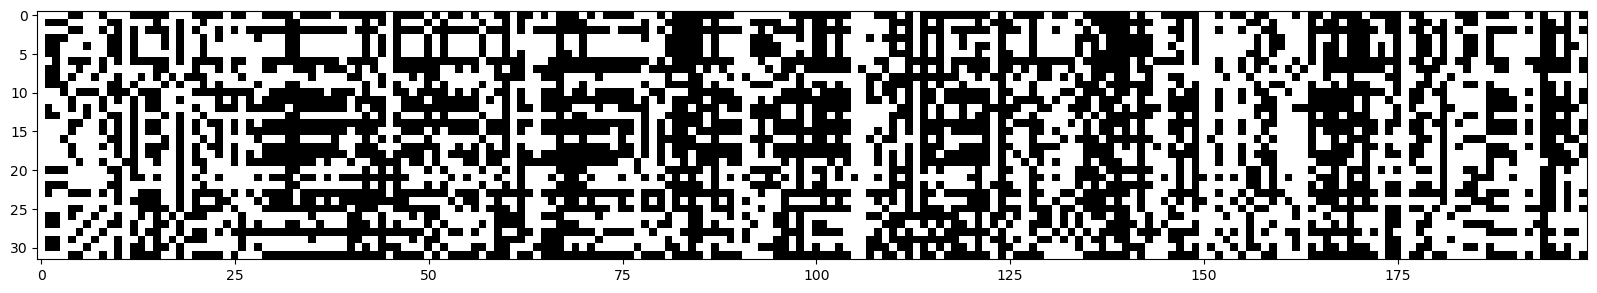

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(ac1.abs()>0.99,cmap="gray",interpolation="nearest");

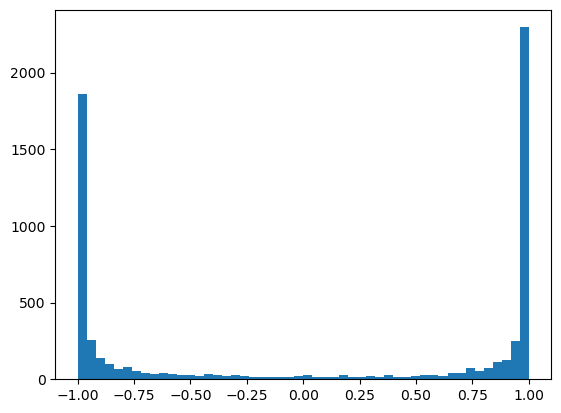

In [15]:
plt.hist(ac1.view(-1).tolist(),50);

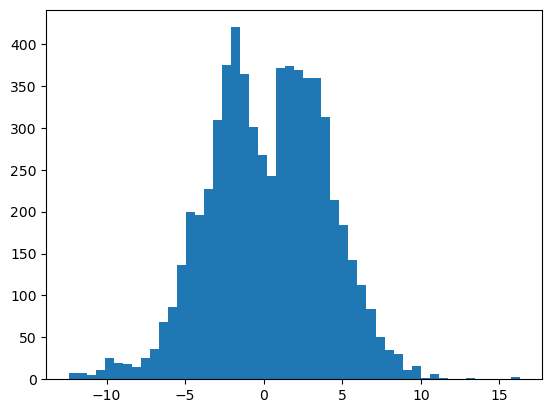

In [16]:
plt.hist(h1.view(-1).tolist(),50);

In [17]:
##full dataset
embed_table=C[X_valid]
h1=embed_table.view(-1,window_size*reduct_dim) @ w1 +b1
ac1=torch.tanh(h1)
logits=ac1 @ w2 +b2
loss=F.cross_entropy(logits,y_valid)
loss
    

tensor(2.2797, grad_fn=<NllLossBackward>)

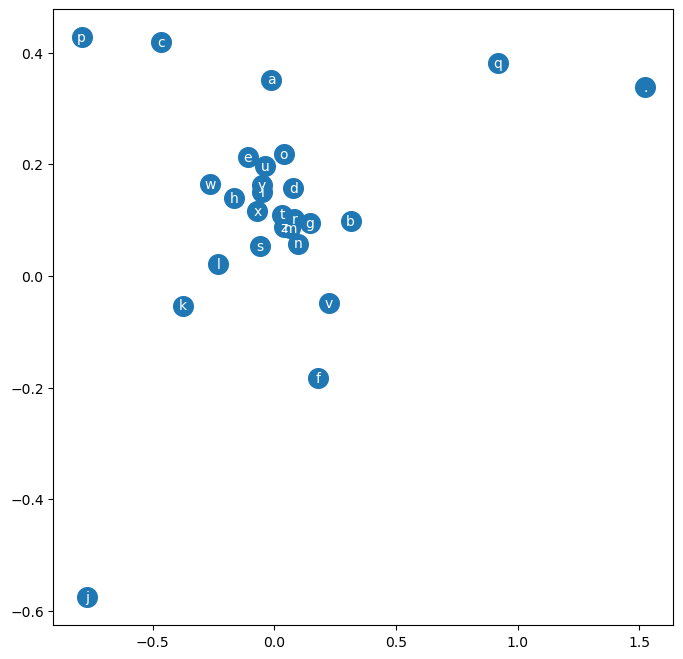

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
   plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha='center',va='center',color='white')

In [19]:
for _ in range(20):
    out=[]
    context=[0]*window_size
    while True:
        emb=C[torch.tensor([context])]
        act1=torch.tanh(emb.view(1,-1) @ w1 +b1)
        logits=act1 @ w2 +b2
        probs = F.softmax(logits,dim=1)
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[o] for o in out))    


sir.
gielyn.
joca.
gomyn.
elup.
asziy.
nosolyn.
dareem.
raxser.
les.
lion.
marr.
city.
cetue.
anrel.
nizileianeella.
der.
abbertin.
dasthusyn.
fath.


In [ ]:


class Linear:
    def __init__(self,i_features,o_features,bias=True):
        self.weight=torch.randn((i_features,o_features),generator=g)/(i_features**0.5) # needs multiply root of in_features to normalize
        self.bias=torch.zeros(o_features) if bias else None
    
    def __call__(self,X):
        self.out=X @ self.weight
        if self.bias is not None:
            self.out+=self.bias
        return self.out
    def _params(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1D:

    def __init__(self,dim,eps=1e-05,momentum=0.1):
        self.eps=eps
        self.momentum=momentum
        self.training=True
        #params
        self.gamma=torch.ones(dim)
        self.beta=torch.zeros(dim)
        #buffers 
        self.running_mean=torch.zeros(dim)
        self.running_var=torch.ones(dim)

    def __call__(self,X):
        if self.training:
            xmean=X.mean(0,keepdim=True)# batch mean
            xvar=X.var(0,keepdim=True,unbiased=True) # batch variance
        else:
            xmean=self.running_mean
            xvar=self.running_var
        xhat=(X-xmean)/torch.sqrt(xvar+self.eps) # normalize the unit variance
        self.out = self.gamma*xhat +self.beta

        if self.training:
            with torch.no_grad():
                self.running_mean=(1-self.momentum)* self.running_mean + self.momentum *xmean
                self.running_var=(1-self.momentum)* self.running_var + self.momentum *xvar
        return self.out
    
    def _params(self):
        return [self.gamma,self.beta]
    
class Tanh:
    def __call__(self,X):
        self.out = torch.tanh(X)
        return self.out
    def _params(self):
        return []
    

## Network Parameters
n_embed=10
n_hidden=100
window_size=3
vocab_size=len(itos)
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((vocab_size,n_embed),generator=g)
L=[
    Linear(n_embed*window_size,n_hidden,bias=False),BatchNorm1D(n_hidden),Tanh(),
    Linear(n_hidden,n_hidden,bias=False),BatchNorm1D(n_hidden),Tanh(),
    Linear(n_hidden,n_hidden,bias=False),BatchNorm1D(n_hidden),Tanh(),
    Linear(n_hidden,n_hidden,bias=False),BatchNorm1D(n_hidden),Tanh(),
    Linear(n_hidden,n_hidden,bias=False),BatchNorm1D(n_hidden),Tanh(),
    Linear(n_hidden,vocab_size,bias=False),BatchNorm1D(vocab_size),
]

with torch.no_grad():
    L[-1].gamma*=0.1
    for layer in L[:-1]:
        if isinstance(layer,Linear):
            layer.weight*=1.0 #5/3 to Linear (use 1 instead 5/3 that is for Tanh)

parameters=[C] +[p for layer in L for p in layer._params()]
print(sum(p.nelement() for p in parameters))

for p in parameters:
    p.requires_grad=True


        

47024


In [25]:

##Model Training
n_epochs=200000
batch_size=32
loss_list=[]
udr=[]
for i in range(n_epochs):
    ##mini-batch
    ix=torch.randint(0,X_train.shape[0],(batch_size,),generator=g)
    Xb=X_train[ix]
    yb=y_train[ix]
    embed_table=C[Xb]
    X=embed_table.view(embed_table.shape[0],-1)
    #forward pass
    for layer in L:
        X=layer(X)
    loss=F.cross_entropy(X,yb)
    
    #backward pass
    for layer in L:
        layer.out.retain_grad()
    for p in parameters:
        p.grad=None
    loss.backward()

    #track learning rate
    #lr=lrs[i]
    #lri.append(lre[i])
    #lossi.append(loss.item())

    #param update
    lr = 0.1 if i <150000 else 0.01
    for p in parameters:
        p.data-=lr*(p.grad)
    
    if i % 10000 == 0:
        print(f"{i:7d} / {n_epochs} : {loss.item():4f}")
    loss_list.append(loss.item())

    with torch.no_grad():
        udr.append([lr*(p.grad).std()/p.data.std().item() for p in parameters])


print("="*8)
print(f"Last Loss: {loss.item():4f}")
print("="*8)


      0 / 200000 : 3.287031
  10000 / 200000 : 2.327345
  20000 / 200000 : 2.101886
  30000 / 200000 : 1.901960
  40000 / 200000 : 2.164281
  50000 / 200000 : 2.152022
  60000 / 200000 : 1.776667
  70000 / 200000 : 2.151388
  80000 / 200000 : 2.380176
  90000 / 200000 : 1.933830
 100000 / 200000 : 2.394272
 110000 / 200000 : 2.150762
 120000 / 200000 : 2.181313
 130000 / 200000 : 2.088919
 140000 / 200000 : 1.809559
 150000 / 200000 : 1.913264
 160000 / 200000 : 1.979288
 170000 / 200000 : 1.965383
 180000 / 200000 : 2.246192
 190000 / 200000 : 1.960115
Last Loss: 2.018238


In [26]:
#Model Evalution
@torch.no_grad()
def split_loss(split_type):
    X,y={
        'train':(X_train,y_train),
        'val':(X_valid,y_valid),
        'test':(X_test,y_test)
    }[split_type]
    embed_table=C[X]
    X=embed_table.view(embed_table.shape[0],-1)
    for layer in L:
        X=layer(X)
    loss=F.cross_entropy(X,y)
    print(f"{split_type} data --> Loss:{loss}")

for layer in L:
    layer.training=False

split_loss('val')
split_loss('test')
    

val data --> Loss:2.0770881175994873
test data --> Loss:2.0810487270355225


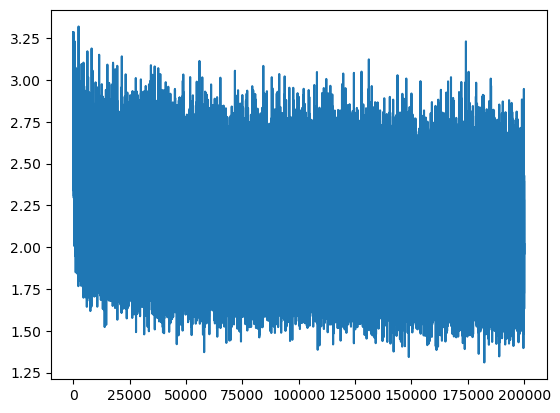

In [27]:
plt.plot(loss_list);

In [28]:
## Name Production Using Model
g = torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out=[]
    context=[0]*window_size
    while True:
        emb=C[torch.tensor([context])]
        X=emb.view(emb.shape[0],-1)
        for layer in L:
            X=layer(X)
        probs = F.softmax(X,dim=1)
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(itos[o] for o in out))    

carlah.
amelle.
khyim.
shreety.
skanden.
jazhiel.
deliah.
jareei.
nellara.
chaiivon.
leigh.
ham.
joce.
quintis.
lilea.
jadilyn.
jermaijaryxia.
kaellissa.
med.
edi.


Layer2 (Tanh): mean:0.02, std:0.77, saturated:%18.00
Layer5 (Tanh): mean:-0.07, std:0.80, saturated:%24.00
Layer8 (Tanh): mean:-0.00, std:0.83, saturated:%28.00
Layer11 (Tanh): mean:-0.05, std:0.79, saturated:%24.00
Layer14 (Tanh): mean:0.04, std:0.81, saturated:%18.00


Text(0.5, 1.0, 'Activation Distribution')

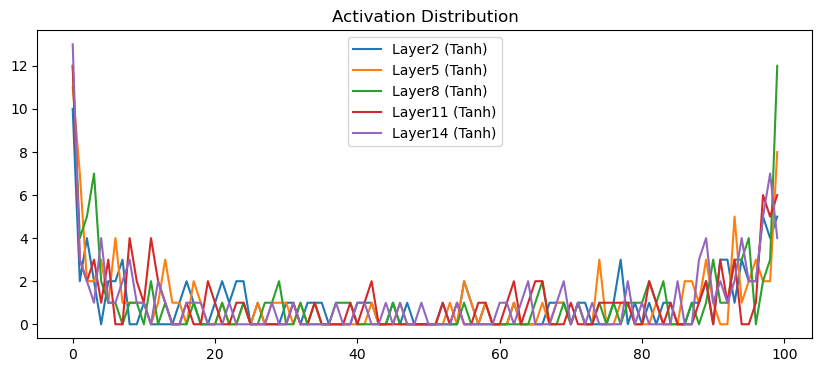

In [35]:
plt.figure(figsize=(10,4))
legends=[]
for i,layer in enumerate(L[:-1]):#exclude output layer 
    if isinstance(layer,Tanh):
        t=layer.out
        s=((t.abs()>0.97).float().mean())* 100
        print(f"Layer{i} ({layer.__class__.__name__}): mean:{t.mean():.2f}, std:{t.std():.2f}, saturated:%{s:.2f}")
        hx=torch.histc(t)
        plt.plot(hx.detach())
        legends.append(f"Layer{i} ({layer.__class__.__name__})")
plt.legend(legends)
plt.title("Activation Distribution")


Weight (27, 10), Mean: 0.00, Std: 0.02, grad-data-ratio: 0.02
Weight (30, 100), Mean: -0.00, Std: 0.01, grad-data-ratio: 0.02
Weight (100, 100), Mean: 0.00, Std: 0.01, grad-data-ratio: 0.02
Weight (100, 100), Mean: 0.00, Std: 0.01, grad-data-ratio: 0.02
Weight (100, 100), Mean: 0.00, Std: 0.01, grad-data-ratio: 0.02
Weight (100, 100), Mean: 0.00, Std: 0.00, grad-data-ratio: 0.02
Weight (100, 27), Mean: -0.00, Std: 0.01, grad-data-ratio: 0.02


Text(0.5, 1.0, 'Weight Gradient Distribution')

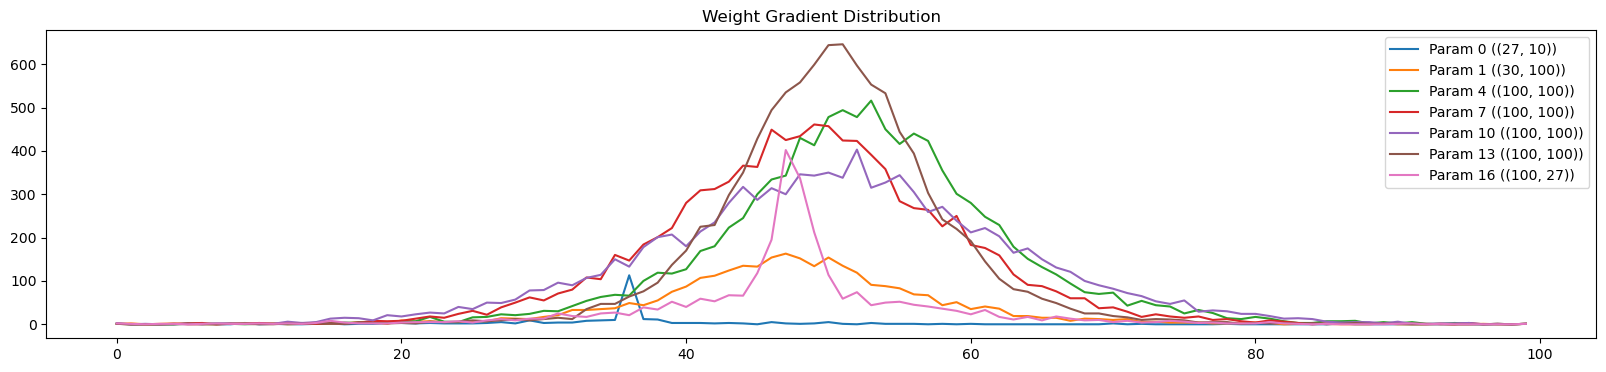

In [36]:
plt.figure(figsize=(20,4))
legends=[]
for i,p in enumerate(parameters):
    t=p.grad
    if p.ndim == 2:
        print(f"Weight {tuple(p.shape)}, Mean: {t.mean():.2f}, Std: {t.std():.2f}, grad-data-ratio: {(t.std()/p.std()):.2f}")
        hx=torch.histc(t)
        plt.plot(hx.detach())
        legends.append(f"Param {i} ({tuple(p.shape)})")
plt.legend(legends)
plt.title("Weight Gradient Distribution")
        



Text(0.5, 1.0, 'Update Data Ratio Distribution')

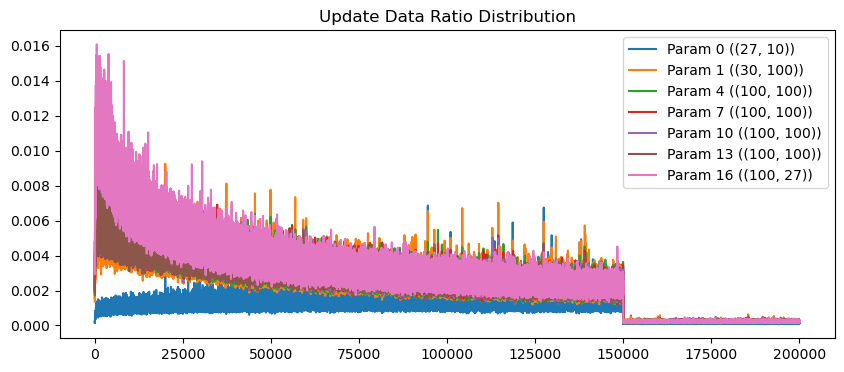

In [48]:
plt.figure(figsize=(10,4))
legends=[]
for i,p in enumerate(parameters):
    if p.ndim == 2:
        plt.plot([udr[j][i]for j in range(len(udr))])
        legends.append(f"Param {i} ({tuple(p.shape)})")
#plt.plot([0, len(udr)], [-0.001, -0.001], 'k')
plt.legend(legends)
plt.title("Update Data Ratio Distribution")